### Загрузить датасет в соответствии с вариантом и провести визуальный и разведочный анализ данных.

Определить входные и выходные переменные.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [144]:
data = pd.read_csv('classification_2_2808.csv')
data.head()

,age,sex,profession,income
0,29.0,female,worker,low
1,36.0,female,homewife,low
2,34.0,female,homewife,low
3,37.0,female,homewife,low
4,30.0,female,worker,low


In [145]:
data.shape

(10000, 4)

In [146]:
data.describe()

,age
count,9509.000000
mean,34.955726
std,4.995458
min,18.000000
25%,32.000000
50%,35.000000
75%,38.000000
max,54.000000


Проверить наличие пропущенных значений в данных.

In [147]:
data.isnull().sum()

age           491
sex           491
profession      0
income          0
dtype: int64

Для количественных признаков построить диаграммы рассеяния и диаграммы Box-and-Whisker, для категориальных признаков – гистограммы частот вариантов. Сделать выводы о характере распределений признаков, наличии выбросов.
В исходном датасете количественным признаком является только 'age'

array([[<Axes: title={'center': 'age'}>]], dtype=object)

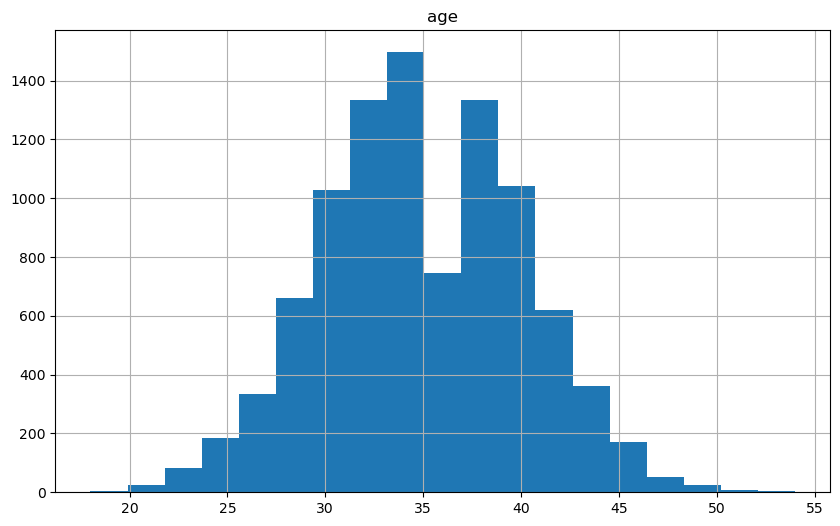

In [148]:
data.hist(figsize=(10, 6), bins=19)

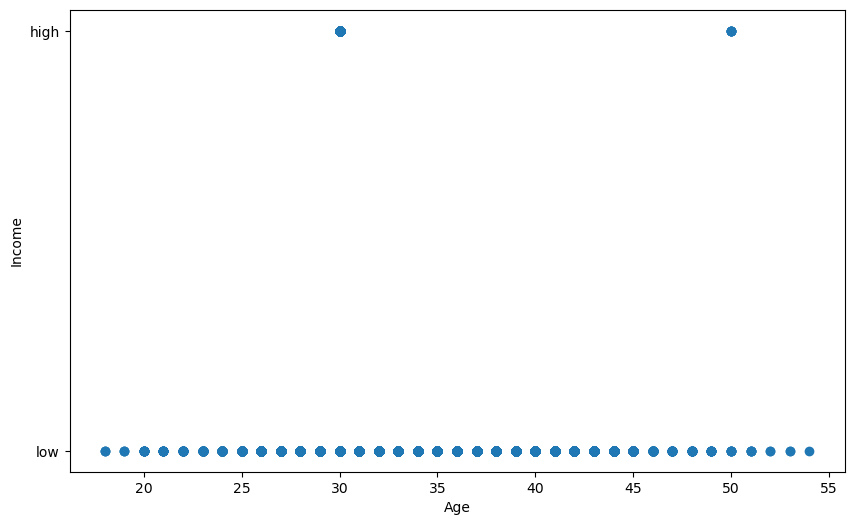

In [98]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data['age'], y = data['income'])
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [99]:
def show_box_and_whisker(data, by):
    data.boxplot(column='age', by=by)
    plt.xlabel("Age")
    plt.ylabel("Income")
    plt.show()

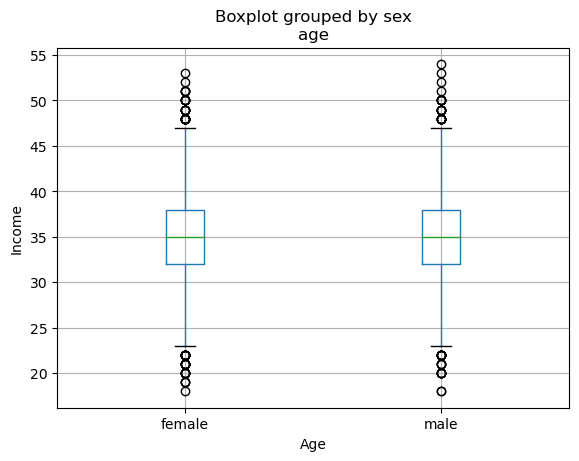

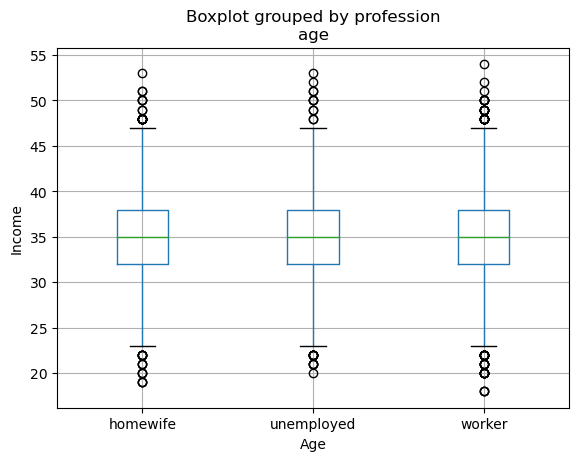

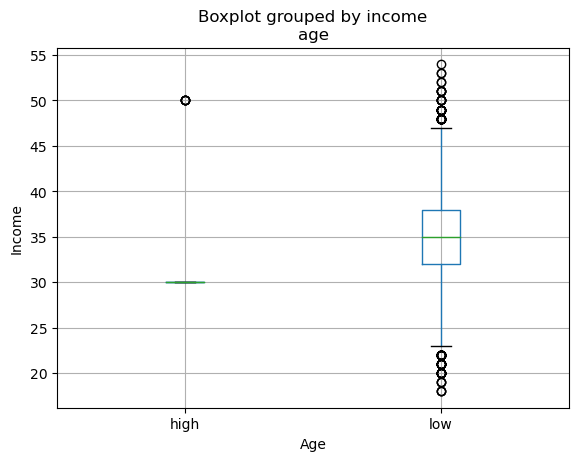

In [100]:
show_box_and_whisker(data, 'sex')
show_box_and_whisker(data, 'profession')
show_box_and_whisker(data, 'income')

<Axes: >

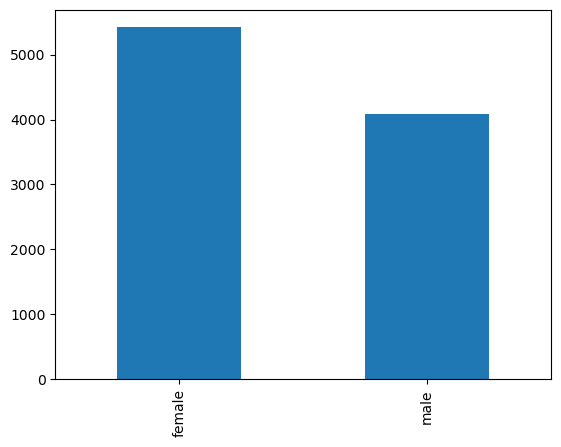

In [101]:
data.sex.value_counts().plot(kind='bar')

<Axes: >

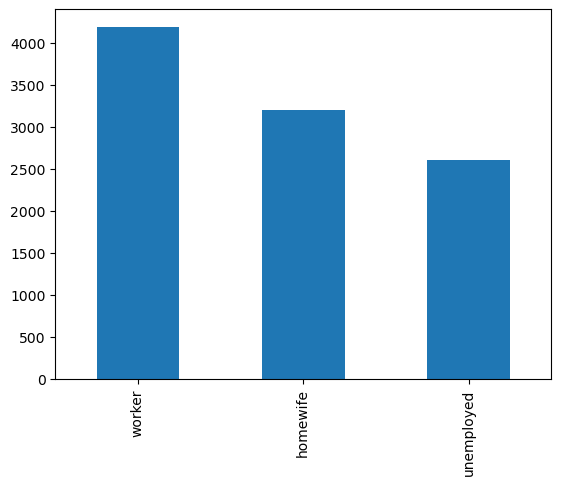

In [102]:
data.profession.value_counts().plot(kind='bar')

<Axes: >

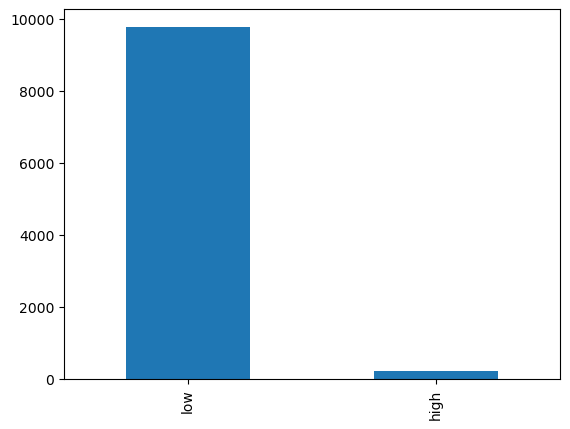

In [103]:
data.income.value_counts().plot(kind='bar')

Для количественных переменных построить диаграммы рассеяния и рассчитать статистику (среднее значение, размах, число вариантов и др.).

In [104]:
print(f"Среднее значение возраста: {data['age'].mean()}")
print(f"Размах возраста: {data['age'].std()}")
print(f"Число уникальных значений возраста: {len(data['age'].value_counts())}")

Среднее значение возраста: 34.95572615416973
Размах возраста: 4.995458188676914
Число уникальных значений возраста: 37


### Построить базовую модель машинного обучения.

Устранить строки с пропущенными значениями.

In [105]:
nulls = data.isna().sum()
print(nulls)

age           491
sex           491
profession      0
income          0
dtype: int64


In [106]:
data = data.dropna()
data.shape

(9509, 4)

Провести OneHot-кодирование номинальных признаков (используя метод sklearn.preprocessing.OneHotEncoder с опцией drop=’first’).

Разбить исходную выборку на обучающую и тестовую (70% первых строк включить в обучающую выборку, оставшиеся строки – в тестовую).

In [107]:
from sklearn.model_selection import train_test_split

Y = data['income']
X = data.drop(['income'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)

In [118]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

categorical = ['sex', 'profession']
numeric = ['age']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(categories='auto', drop='first'), categorical),
    ('scaling', StandardScaler(), numeric)
])

# column_transformer = ColumnTransformer([
#     ('ohe', OneHotEncoder(categories='auto',drop='first'), categorical),
#     ('scaling', MinMaxScaler(), numeric)
# ])

X_train = column_transformer.fit_transform(x_train)
X_test = column_transformer.transform(x_test)

In [119]:
pd.DataFrame(X_train).head

<bound method NDFrame.head of         0    1    2         3
0     0.0  0.0  1.0 -1.196456
1     0.0  0.0  0.0  0.209726
2     0.0  0.0  0.0 -0.192040
3     0.0  0.0  0.0  0.410609
4     0.0  0.0  1.0 -0.995573
...   ...  ...  ...       ...
6651  1.0  0.0  1.0  0.209726
6652  1.0  0.0  1.0  1.013259
6653  1.0  0.0  1.0  0.209726
6654  1.0  1.0  0.0  0.008843
6655  1.0  1.0  0.0  0.410609

[6656 rows x 4 columns]>

Провести OneHot-кодирование меток класса (для задач классификации).

In [117]:
Y_train = pd.get_dummies(y_train, drop_first=True)
Y_test = pd.get_dummies(y_test, drop_first=True)

Визуализировать корреляционную матрицу признаков, сделать выводы.

<Axes: >

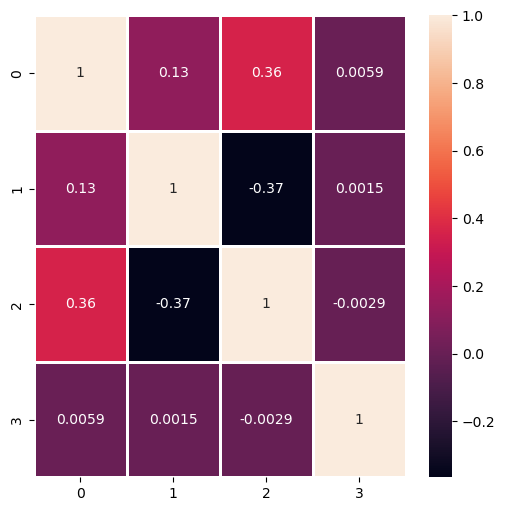

In [121]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(data=pd.DataFrame(data=X_train).corr(),linewidths=1,annot=True)

Сильно скоррелированных признаков нет

Обучить модель логистической регрессии.

In [122]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='newton-cg', multi_class='auto', max_iter=1000)
clf.fit(X_train,Y_train)

c:\Users\dsash\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, solver='newton-cg')

Построить матрицы ошибок (confusion matrix) классификатора и рассчитать точность классификации на обучающей и тестовой выборках.

In [135]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print('Train:')
pd.DataFrame(confusion_matrix(Y_train, clf.predict(X_train)),columns=['Predict-0','Predict-1'],index=['Actual-0','Actual-1'])

Train:


,Predict-0,Predict-1
Actual-0,0,63
Actual-1,0,6593


In [136]:
print('Test')
pd.DataFrame(confusion_matrix(Y_test, clf.predict(X_test)),columns=['Predict-0','Predict-1'],index=['Actual-0','Actual-1'])

Test


,Predict-0,Predict-1
Actual-0,0,142
Actual-1,0,2711


In [137]:
print(f'Точность на обучающей выборке:{accuracy_score(Y_train,clf.predict(X_train))}')

Точность на обучающей выборке:0.9905348557692307


In [138]:
print(f'Точность на тестовой выборке:{accuracy_score(Y_test,clf.predict(X_test))}')

Точность на тестовой выборке:0.9502278303540134


Рассчитать F1-меру классификатора на обучающей и тестовой выборках для каждого класса и микро-усредненное значение F1-меры по всем классам.

In [139]:
print(f'Обучающая выборка:\n{classification_report(Y_train, clf.predict(X_train))}')
print(f'Тестовая выборка:\n{classification_report(Y_test, clf.predict(X_test))}')

Обучающая выборка:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.99      1.00      1.00      6593

    accuracy                           0.99      6656
   macro avg       0.50      0.50      0.50      6656
weighted avg       0.98      0.99      0.99      6656

Тестовая выборка:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.95      1.00      0.97      2711

    accuracy                           0.95      2853
   macro avg       0.48      0.50      0.49      2853
weighted avg       0.90      0.95      0.93      2853



c:\Users\dsash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dsash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dsash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dsash\anaconda3\Lib\site-packages\sklearn\metr

### Улучшить точность базовой модели.

Выбрать метод и провести восстановление пропущенных значений в обучающей выборке.

In [182]:
data = pd.read_csv('classification_2_2808.csv')
data.head()

,age,sex,profession,income
0,29.0,female,worker,low
1,36.0,female,homewife,low
2,34.0,female,homewife,low
3,37.0,female,homewife,low
4,30.0,female,worker,low


In [183]:
data['age'] = data['age'].fillna(data['age'].mean()).round(0)

In [184]:
data['sex'] = data['sex'].fillna(np.random.choice(['male','female']))

In [185]:
data.isnull().sum()

age           0
sex           0
profession    0
income        0
dtype: int64

Предложить метод и устранить выбросные значения в обучающей выборке.

In [186]:
q1 = data['age'].quantile(0.25)
q3 = data['age'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

In [187]:
print(data.duplicated().sum())
# data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

9754
9754


Выбрать способ и провести преобразования входных и выходных переменных, привести обоснование выбранного способа преобразования.

In [188]:
from sklearn.model_selection import train_test_split

Y = data['income']
X = data.drop(['income'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [189]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

categorical = ['sex', 'profession']
numeric = ['age']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(categories='auto',drop='first'), categorical),
    ('scaling', MinMaxScaler(), numeric)
])

X_train = column_transformer.fit_transform(x_train)
X_test = column_transformer.transform(x_test)

In [190]:
Y_train = pd.get_dummies(y_train, drop_first=True)
Y_test = pd.get_dummies(y_test, drop_first=True)

При необходимости провести отбор признаков / сократить размерность числа признаков/ сформировать новые признаки. Привести обоснование использованных методов формирования признаков.

Признаков и так мало

Выбрать модель и алгоритм машинного обучения для решения поставленной задачи или модифицировать базовую модель, привести обоснование выбора / модификаций.

In [191]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [195]:
clf_RFC = RandomForestClassifier(random_state=42)

Провести обучение модели, рассчитать показатели качества модели на обучающей и тестовой выборках.

In [196]:
clf_RFC.fit(X_train, Y_train)

C:\Users\dsash\AppData\Local\Temp\ipykernel_24008\2590082445.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RFC.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

In [197]:
accuracy = accuracy_score(Y_train, clf_RFC.predict(X_train))
print(f"Точность на тестовой выборке: {accuracy}")
accuracy = accuracy_score(Y_test, clf_RFC.predict(X_test))
print(f"Точность на тестовой выборке: {accuracy}")

Точность на тестовой выборке: 0.9988434292323262
Точность на тестовой выборке: 0.9979763912310287


In [198]:
pd.DataFrame(confusion_matrix(Y_test, clf_RFC.predict(X_test)),columns=['Predict-0','Predict-1'],index=['Actual-0','Actual-1'])

,Predict-0,Predict-1
Actual-0,67,6
Actual-1,0,2892


In [199]:
print(f'Обучающая выборка:\n{classification_report(Y_train, clf.predict(X_train))}')
print(f'Тестовая выборка:\n{classification_report(Y_test, clf.predict(X_test))}')

Обучающая выборка:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       140
           1       1.00      1.00      1.00      6777

    accuracy                           1.00      6917
   macro avg       1.00      0.97      0.98      6917
weighted avg       1.00      1.00      1.00      6917

Тестовая выборка:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        73
           1       1.00      1.00      1.00      2892

    accuracy                           1.00      2965
   macro avg       1.00      0.96      0.98      2965
weighted avg       1.00      1.00      1.00      2965



In [209]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 30, 50, 100, 150],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [1, 3, 4, 5]
}

model = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=3)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [1, 3, 4, 5],
                         'n_estimators': [10, 30, 50, 100, 150]},
             scoring='f1')

In [210]:
best_classifier = grid_search.best_estimator_

print(classification_report(Y_test, best_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        73
           1       1.00      1.00      1.00      2892

    accuracy                           1.00      2965
   macro avg       1.00      0.96      0.98      2965
weighted avg       1.00      1.00      1.00      2965



Сравнить полученные результаты с аналогичными результатами для базовой модели, сделать выводы.

XGboost показал лучшый результат за счет поиска опитимальных параметров